In [1]:
import models
import numpy as np
import pyro
import sim
import util
from IPython.display import clear_output

clear_output()

### Synthetic Data

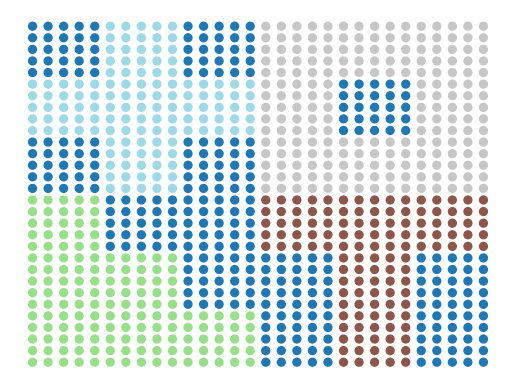

In [2]:
N_GENES = 1000
N_INFORMATIVE = 1000
N_CELLS = 1
N_TOPICS = 1
BLOCKS = sim.GGBLOCKS
MODE = 'block'
MIXED = False

X, X_labels = sim.generate_dataset(N_GENES, N_INFORMATIVE, N_CELLS, N_TOPICS, BLOCKS, MODE, MIXED)
util.visualize_dataset(X, X_labels, size=32, show_ax=False)

100%|██████████| 1000/1000 [00:03<00:00, 321.10it/s]

Score: 1.0


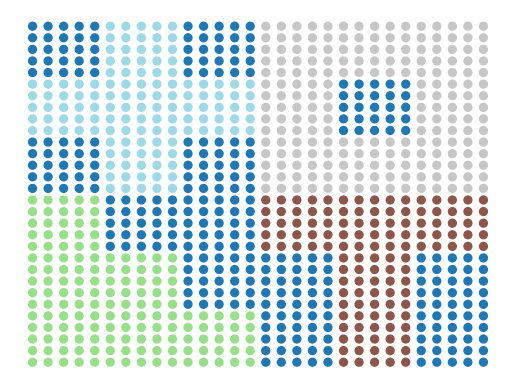

In [30]:
N_TOPICS = np.unique(X_labels).shape[0]
N_WORDS = 15
VOCAB_SIZE = 10
HIDDEN_DIM = (VOCAB_SIZE + N_TOPICS)//2
N_STEPS = 1000
LEARNING_RATE = 1e-2
GP_STEPS = 1000

pyro.clear_param_store()

model = models.GPNTM(N_TOPICS, N_WORDS, VOCAB_SIZE, HIDDEN_DIM).fit(X, N_STEPS, LEARNING_RATE, GP_STEPS)
Y_labels, score = util.evaluate(X_labels, model.transform().argmax(-1))
print('Score:', score)
util.visualize_dataset(X, Y_labels, size=32, show_ax=False)

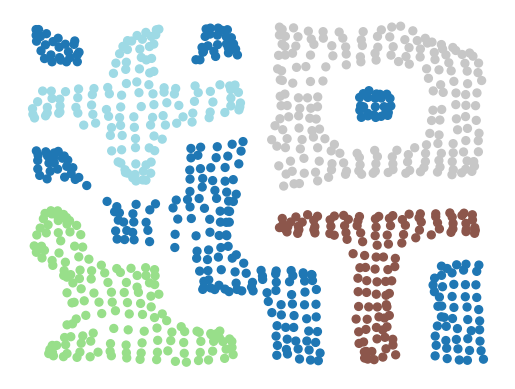

In [31]:
util.visualize_dataset(model.X_locs_.detach(), X_labels, size=32, show_ax=False)

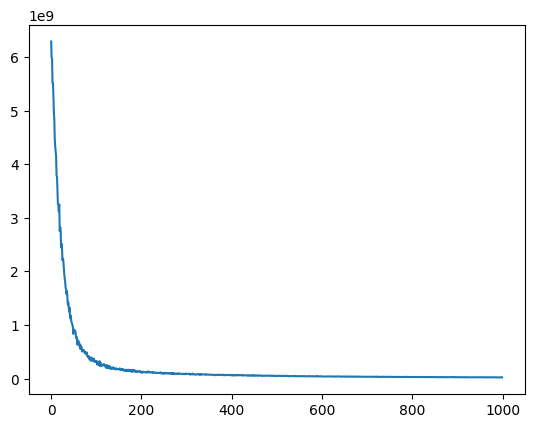

In [32]:
util.visualize_log(model.process_log_)

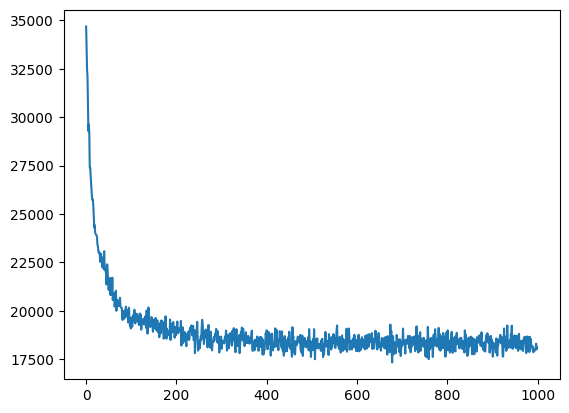

In [33]:
util.visualize_log(model.loss_log_)

### Spinal Data

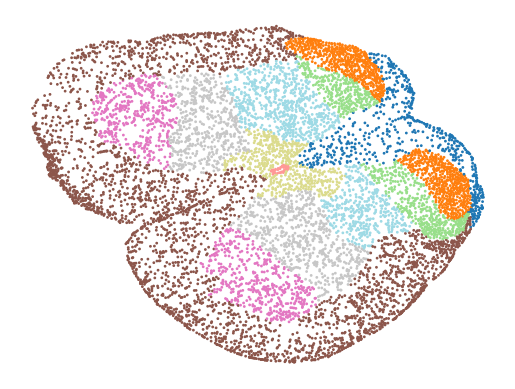

In [36]:
X, X_labels = util.process_spine()
clear_output()
util.visualize_dataset(X, X_labels, size=1, show_ax=False)

100%|██████████| 1000/1000 [00:15<00:00, 64.25it/s]


Score: 0.32705615428247303


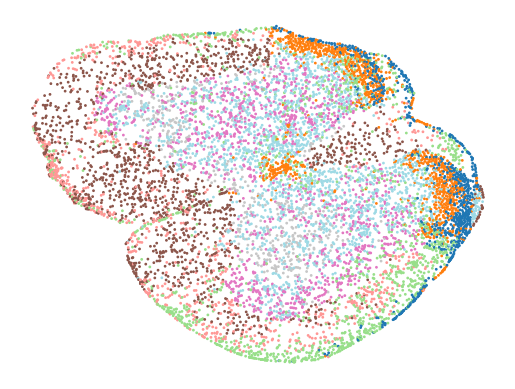

In [54]:
N_TOPICS = np.unique(X_labels).shape[0]
N_WORDS = 100
VOCAB_SIZE = 25
HIDDEN_DIM = (VOCAB_SIZE + N_TOPICS)//2
N_STEPS = 1000
LEARNING_RATE = 1e-3
GP_STEPS = 1000

pyro.clear_param_store()

model = models.GPNTM(N_TOPICS, N_WORDS, VOCAB_SIZE, HIDDEN_DIM).fit(X, N_STEPS, LEARNING_RATE, GP_STEPS)
Y_labels, score = util.evaluate(X_labels, model.transform().argmax(-1))
print('Score:', score)
util.visualize_dataset(X, Y_labels, size=1, show_ax=False)

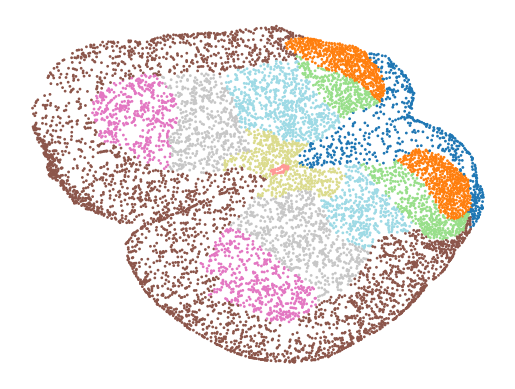

In [55]:
util.visualize_dataset(model.X_locs_.detach(), X_labels, size=1, show_ax=False)

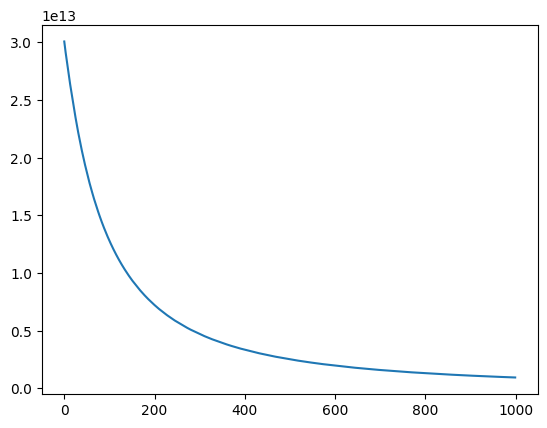

In [56]:
util.visualize_log(model.process_log_)

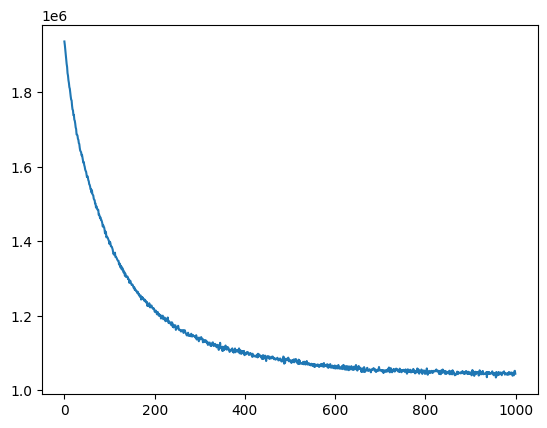

In [57]:
util.visualize_log(model.loss_log_)